<a href="https://colab.research.google.com/github/vanshikapringle/SCT_DS_2/blob/main/Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Setup and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(train.info())
print(train.describe())
train.head()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Data Cleaning
# Summary of missing values
print(train.isnull().sum())

# Impute Age with median
train['Age'].fillna(train['Age'].median(), inplace=True)

# Drop 'Cabin' due to high missingness
train.drop('Cabin', axis=1, inplace=True)

# Fill missing 'Embarked' with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-4048819698.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/tmp/ipython-input-4048819698.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [5]:
#Descriptive Statistics
print(train.describe())
print(train.describe(include='O'))  # Categorical stats


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                       Name   Sex  Ticket Embarked
count                   891   

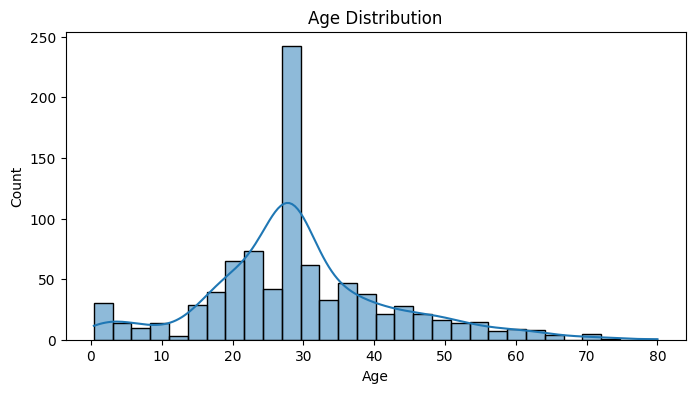

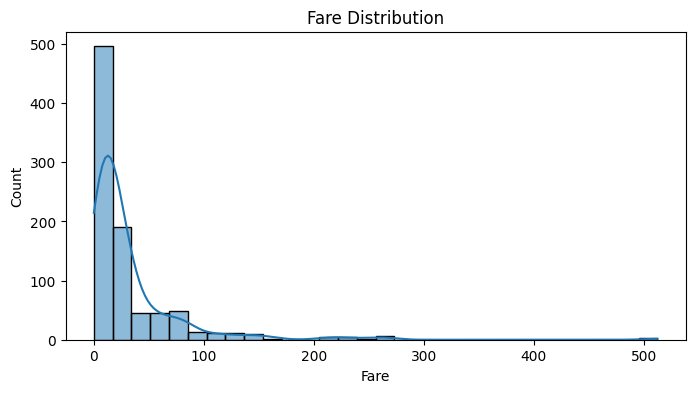

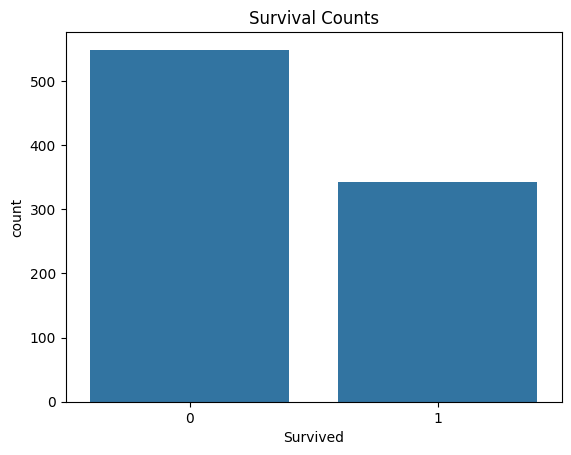

In [6]:
#Visualizing Distributions
# Age distribution (histogram)
plt.figure(figsize=(8, 4))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Fare distribution
plt.figure(figsize=(8, 4))
sns.histplot(train['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Survival count
sns.countplot(x='Survived', data=train)
plt.title('Survival Counts')
plt.show()


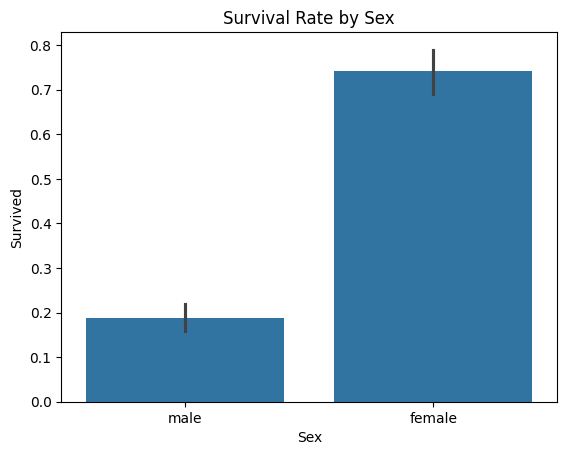

In [7]:
#Exploration of Relationships
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Sex')
plt.show()


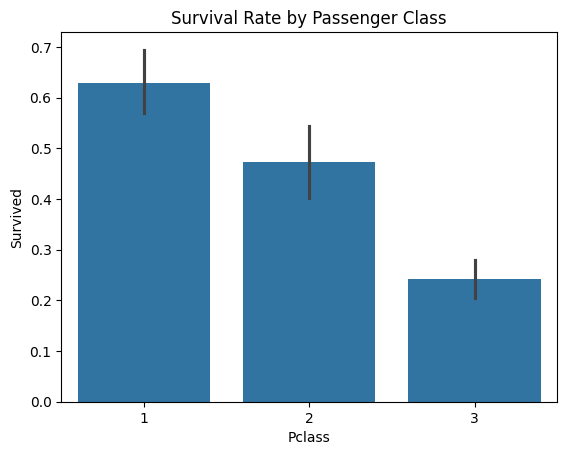

In [8]:
# Survival by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.show()


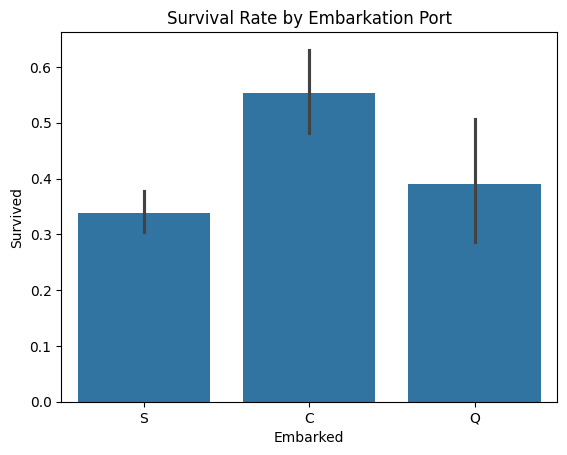

In [9]:
# Survival by Embarkation Point
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survival Rate by Embarkation Port')
plt.show()


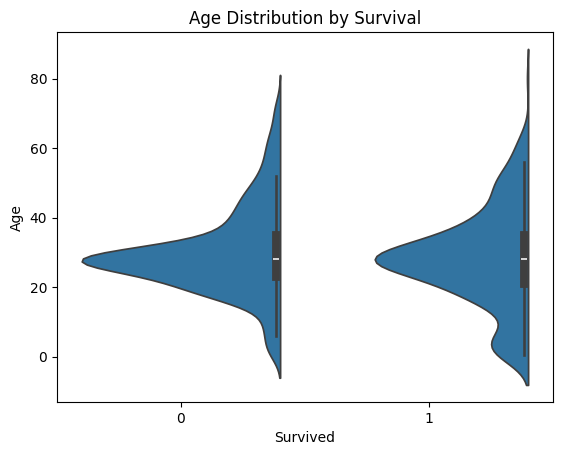

In [10]:
#Age vs. Survival
sns.violinplot(x='Survived', y='Age', data=train, split=True)
plt.title('Age Distribution by Survival')
plt.show()


In [11]:
# Group analysis using Titanic train data

# Group by Sex: average survival rate
print(train.groupby('Sex')['Survived'].mean())

# Group by Pclass: average survival rate
print(train.groupby('Pclass')['Survived'].mean())

# Group by Embarked: survival rate
print(train.groupby('Embarked')['Survived'].mean())

# Group by Pclass and Sex: survival rate
print(train.groupby(['Pclass', 'Sex'])['Survived'].mean())

# Group by Age range (binning into categories)
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, 100],
                           labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Group by AgeGroup: survival rate
print(train.groupby('AgeGroup')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64
AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64


/tmp/ipython-input-2661394942.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby('AgeGroup')['Survived'].mean())


/tmp/ipython-input-2966477581.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_survival = train.groupby('AgeGroup')['Survived'].mean().reset_index()


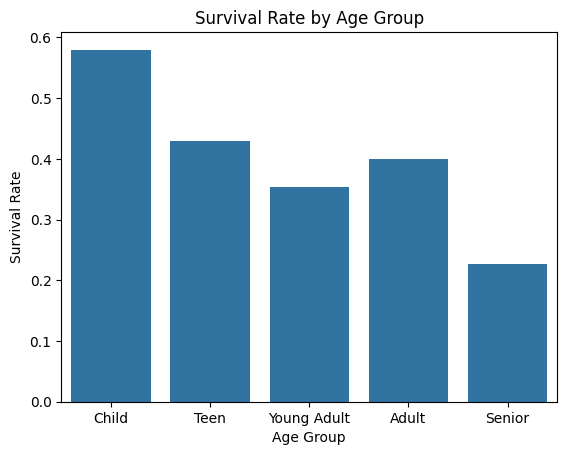

In [12]:
# Plot survival rate by AgeGroup
agegroup_survival = train.groupby('AgeGroup')['Survived'].mean().reset_index()

sns.barplot(data=agegroup_survival, x='AgeGroup', y='Survived')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()

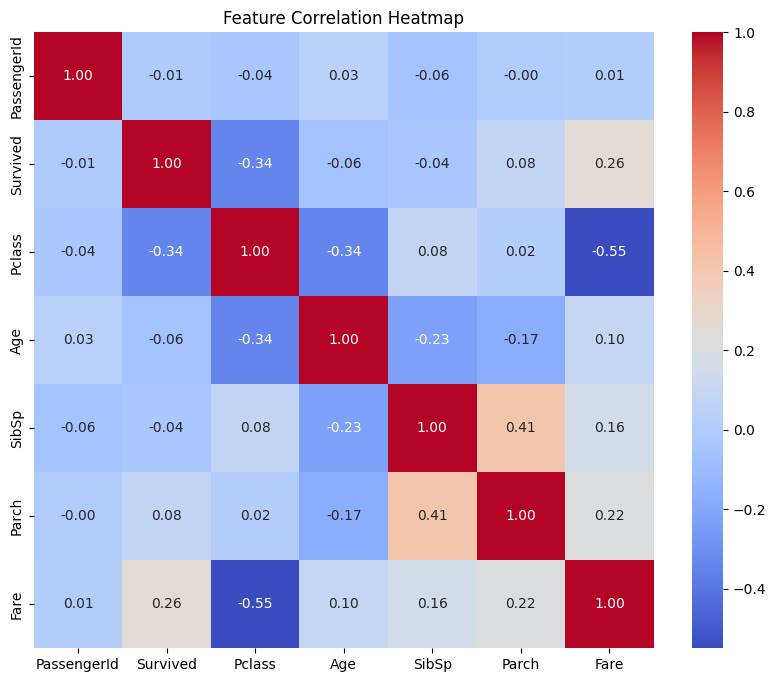

In [13]:
numeric_df = train.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()